## Método de Euler y el Péndulo simple

<section class="post-meta">
Carlos Ruestes / Cristián Sánchez - Taller de Física Computacional - FCEN - UNCUYO
</section>
Última edición: Noviembre de 2020 ___ 

Durante el cursado de sus respectivas carreras, tendrán la oportunidad de enfrentar (en más oportunidades de las que podrían desear) la resolución de ecuaciones diferenciales en forma analítica. En otros ámbitos y dependiendo del problema en cuestión, la resolución de ecuaciones diferencias ordinarias (EDOs) se realiza empleando el método de Euler. Este método es muy popular entre docentes y alumnos debido a que resulta sencillo de entender y de implementar. Sin embargo, a efecto de estudios científicos, el método de Euler resulta impreciso comparado con otros. 

## Método de Euler

Consideremos la EDO (no lineal),
$$\dot{x}(t) = \cos(x(t)) + \sin(t), \qquad \dot{x}\equiv\frac{\textrm{d}x(t)}{\textrm{d}t}$$

con condiciones iniciales $x(t_0) = 0, t_0 = 0$. El método de Euler (explícito) resuelve el problema discretizando las variables de forma tal que:  

\begin{align*}
t     & \rightarrow t_n     \qquad\equiv t_0 + n\cdot\Delta t,\\[1.0em]
x(t)  & \rightarrow x(t_n)  \quad\equiv x_n                 ,\\[1.0em]
n     & = 0,1,\ldots,N;                 
\end{align*}

Entonces, el valor de la función en $x_{n+1}$ puede ser aproximado mediante el valor anterior más la tasa cambio (derivada) en dicho punto multiplicado por la distancia en el tiempo $\Delta t$ entre $x_n$ y $x_{n+1}$. Esto es,

$$x_{n+1} = x_n + (\Delta t) \cdot \dot{x}_n, \qquad \Delta t = \frac{t_N - t_0}{N} \equiv h$$


La clave es aproximar la derivada de $x(t)$ en el punto $t_n$ mediante

\begin{equation}
\frac{dx}{dt}_{t=t_n}\approx \frac{x(t_{n+1})-x(t_n)}{h}, h>0.
\label{eq:2}
\end{equation}

Esto es exacto para el límite con $h\to 0$, ya $x(t)$ es diferenciable. Para $h>0$, la ecuación $\eqref{eq:2}$ es solo una aproximación que toma en cuenta el valor de $x(t)$ y el valor en el siguiente punto de la grilla. Por esta razón, este método es de los llamados de aproximación __por diferencias hacia adelante__.  

En la ecuación $\eqref{eq:2}$, aproximamos la pendiente de la recta tangente en $t_n$ ("la derivada") mediante la pendiente de la cuerda que conecta los puntos $(t_n,x(t_n))$ y $(t_{n+1},x(t_{n+1}))$. En la siguiente ilustración: azul - gráfico; puntos - recta tangente; verde - cuerda.

![eulers_method](imagenes/eulers_method.png)


Sustituyendo la aproximación $\eqref{eq:2}$ en la primera ecuación, obtenemos

\begin{equation*}
\frac{x(t_{n+1})-x(t_n)}{h} \approx \cos(x(t_n))+\sin(t_n).
\end{equation*}

Reordenando, usando notación $x_n=x(t_n)$ y escribiendo esto como una igualdad (en lugar de una aprox.) se obtiene

$$x_{n+1} = x_n + h\left[ \cos(x_n)+\sin(t_n)\right].$$

Esta ecuación describe un método iterativo para calcular los valores de una función sucesivamente en todos los puntos de la grilla (nuestra discretización de t) $t_n$ (con $t_n>0$), comenzando en $t_0=0$ y $x_0=0$ en nuestro caso.
A este método se lo conoce como __Método de Euler__. Con esto tenemos todo para resolver este problema. Pueden encontrar información más detallada en la bibliografía.

In [1]:
%matplotlib inline
#%matplotlib notebook
import numpy as np               # Carga numpy, es una librería de funciones matemáticas que iremos aprendiendo
import matplotlib.pyplot as plt  # Carga módulo para gráficos
import time                      # Carga módulo para tiempos

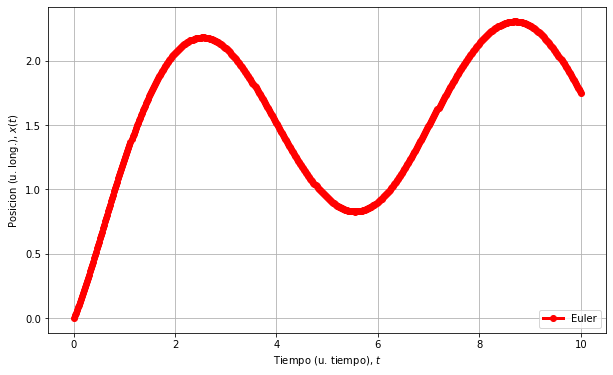

In [2]:
# Implementación rápida para resolver el problema dado
# Nota: Las soluciones son dependientes de los valores iniciales

# Intenten ajustar 'N' para ver como converge la solución numérica

t0   = 0.0
tN   = 10.0
N    = 500
t    = np.linspace(t0,tN,N) #Genera un arreglo de N números entre t0 y tN, igualmente distribuidos
x_Eu = np.zeros(N) ## Euler
h    = (tN-t0)/N

# Condiciones iniciales:
x_Eu[0] = 0

for n in range(0,N-1):
    x_Eu[n+1] = x_Eu[n] + h * (np.cos(x_Eu[n]) + np.sin(t[n]))

plt.figure(figsize=(10,6))
plt.plot(t,x_Eu,'-ro',linewidth=3.0, label=r'Euler')
plt.ylabel(r'Posicion (u. long.), $x(t)$')
plt.xlabel(r'Tiempo (u. tiempo), $t$')
plt.legend(loc=4) # 'loc' posicion del texto / leyenda 
plt.grid()
plt.show()

Haciendo rápidamente un análisis de errores, podemos ver que el error de truncamiento local en <i>uno y cada </i>uno de los pasos es proporcional al paso de tiempo al cuadrado $h^2 = (\Delta t)^2$. Esto se hace mediante una expansión en series de Taylor (Cálculo II) de la función alrededor de $t+h$

\begin{align*}
\text{Exacto:} & \qquad x(t + h) =  x(t) + h\dot{x} + \frac{h^2}{2}\ddot{x} + \frac{h^3}{6}\dddot{x} + \ldots  \\[1.2em]
\text{Euler:} & \qquad x(t + h) \approx  x(t) + h\dot{x}\\[1.2em]
\text{Error:} & \qquad e = \frac{h^2}{2}\ddot{x} + \frac{h^3}{6}\dddot{x} + \ldots
\end{align*}

Ahora bien, iterando un total de $N=\frac{t_N - t_0}{h}\propto h^{-1}$ veces, el error global total es  $E = N\cdot e \propto h$. 

<strong>Ejercicio: Pruebe distinto valores de N y vea como cambia la solución</strong>. 

<strong>Dejaremos por ahora una pregunta pendiente: ¿Podemos obtener una mejor solución aproximada para el mismo paso de tiempo?</strong>. 

# Respuesta

En cuento a la pregunta de si podemos obtener una solución mejor sin aumentar N, sí podemos, solo tenemos que incorporar mas terminos truncados de la serie de taylor en el calculo de x(t + h).

Probando distintos valores de N:

## N = 5

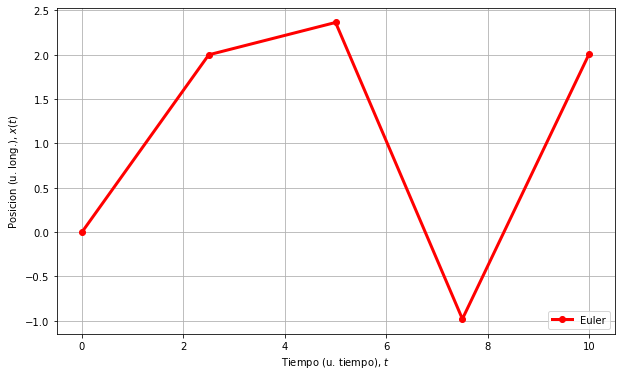

In [3]:
N    = 5
t    = np.linspace(t0,tN,N) #Genera un arreglo de N números entre t0 y tN, igualmente distribuidos
x_Eu = np.zeros(N) ## Euler
h    = (tN-t0)/N

# Condiciones iniciales:
x_Eu[0] = 0

for n in range(0,N-1):
    x_Eu[n+1] = x_Eu[n] + h * (np.cos(x_Eu[n]) + np.sin(t[n]))

plt.figure(figsize=(10,6))
plt.plot(t,x_Eu,'-ro',linewidth=3.0, label=r'Euler')
plt.ylabel(r'Posicion (u. long.), $x(t)$')
plt.xlabel(r'Tiempo (u. tiempo), $t$')
plt.legend(loc=4) # 'loc' posicion del texto / leyenda
plt.grid()
plt.show()

## N = 10

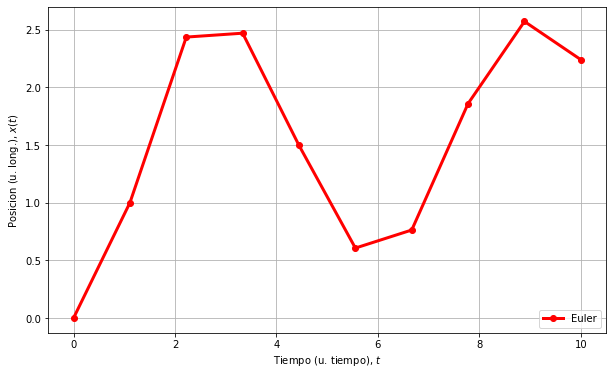

In [4]:
#Para N = 10
N    = 10
t    = np.linspace(t0,tN,N) #Genera un arreglo de N números entre t0 y tN, igualmente distribuidos
x_Eu = np.zeros(N) ## Euler
h    = (tN-t0)/N

# Condiciones iniciales:
x_Eu[0] = 0

for n in range(0,N-1):
    x_Eu[n+1] = x_Eu[n] + h * (np.cos(x_Eu[n]) + np.sin(t[n]))

plt.figure(figsize=(10,6))
plt.plot(t,x_Eu,'-ro',linewidth=3.0, label=r'Euler')
plt.ylabel(r'Posicion (u. long.), $x(t)$')
plt.xlabel(r'Tiempo (u. tiempo), $t$')
plt.legend(loc=4) # 'loc' posicion del texto / leyenda
plt.grid()
plt.show()

## N = 20

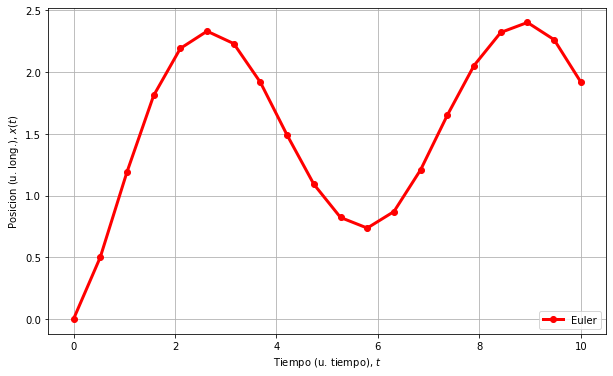

In [5]:
N    = 20
t    = np.linspace(t0,tN,N) #Genera un arreglo de N números entre t0 y tN, igualmente distribuidos
x_Eu = np.zeros(N) ## Euler
h    = (tN-t0)/N

# Condiciones iniciales:
x_Eu[0] = 0

for n in range(0,N-1):
    x_Eu[n+1] = x_Eu[n] + h * (np.cos(x_Eu[n]) + np.sin(t[n]))

plt.figure(figsize=(10,6))
plt.plot(t,x_Eu,'-ro',linewidth=3.0, label=r'Euler')
plt.ylabel(r'Posicion (u. long.), $x(t)$')
plt.xlabel(r'Tiempo (u. tiempo), $t$')
plt.legend(loc=4) # 'loc' posicion del texto / leyenda
plt.grid()
plt.show()


## N = 50

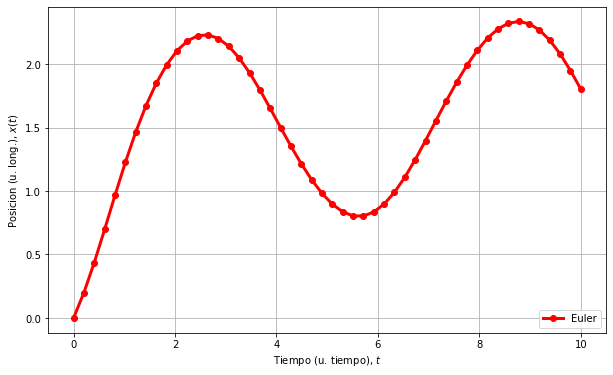

In [6]:
N    = 50
t    = np.linspace(t0,tN,N) #Genera un arreglo de N números entre t0 y tN, igualmente distribuidos
x_Eu = np.zeros(N) ## Euler
h    = (tN-t0)/N

# Condiciones iniciales:
x_Eu[0] = 0

for n in range(0,N-1):
    x_Eu[n+1] = x_Eu[n] + h * (np.cos(x_Eu[n]) + np.sin(t[n]))

plt.figure(figsize=(10,6))
plt.plot(t,x_Eu,'-ro',linewidth=3.0, label=r'Euler')
plt.ylabel(r'Posicion (u. long.), $x(t)$')
plt.xlabel(r'Tiempo (u. tiempo), $t$')
plt.legend(loc=4) # 'loc' posicion del texto / leyenda
plt.grid()
plt.show()


## N = 100

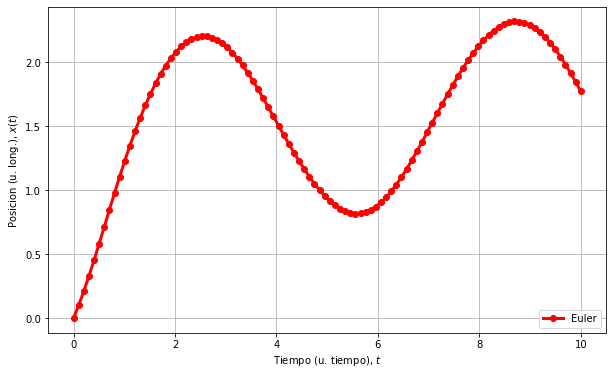

In [7]:
N    = 100
t    = np.linspace(t0,tN,N) #Genera un arreglo de N números entre t0 y tN, igualmente distribuidos
x_Eu = np.zeros(N) ## Euler
h    = (tN-t0)/N

# Condiciones iniciales:
x_Eu[0] = 0

for n in range(0,N-1):
    x_Eu[n+1] = x_Eu[n] + h * (np.cos(x_Eu[n]) + np.sin(t[n]))

plt.figure(figsize=(10,6))
plt.plot(t,x_Eu,'-ro',linewidth=3.0, label=r'Euler')
plt.ylabel(r'Posicion (u. long.), $x(t)$')
plt.xlabel(r'Tiempo (u. tiempo), $t$')
plt.legend(loc=4) # 'loc' posicion del texto / leyenda
plt.grid()
plt.show()

# Péndulo simple

## Introducción

El péndulo simple es un caso simple e ideal de un péndulo real. Consiste de una masa puntual $m$ suspendida por un cable o varilla indeformable, sin masa, y de longitud $L$, ver Figura [1](#im1). Este péndulo se mueve solamente en el plano, sin fricción. Sea $\theta$ el ángulo entre el eje vertical y el cable, de forma tal que $\theta=0$ corresponda al equilibrio. La posición del péndulo puede ser unívocamente determinada usando $\theta$. Si movemos la masa hacia un costado y la soltamos, comenzará a oscilar en torno a la posición de equilibrio.

Hay dos fuerzas que actúan sobre la masa: la fuerza gravitatoria $\mathbf{F} = m\mathbf{g}$ y la fuerza de reacción del cable $\mathbf{S}$. Las fuerzas pueden ser descompuestas en dos direcciones, a lo largo del eje del cable (dirección radial, $\hat r$) y en una dirección angular ($\hat \theta$). Debido a que el cable no se puede estirar, solo la contribución $\mathbf F_\theta$ de la fuerza gravitatoria contribuye al movimiento del péndulo. La fuerza gravitatoria en dirección radial, $\mathbf F_r$, se cancela mediante la reacción del cable: $\mathbf F_r = - \mathbf{S}$. A partir de la figura [1](#im1), es claro que
\begin{equation}
F_\theta = -mg\sin\theta.
\end{equation}

Usando la segunda ley de Newton, $\mathbf{F}=m\mathbf{a}$, podemos encontrar una ecuación diferencial que describa el movimiento del péndulo. Sea $t$ el tiempo. La aceleración de la masa puntual puede ser expresada mediante

\begin{equation}
\mathbf{a} = \frac{\mathrm{d}^2\theta}{\mathrm{d} t^2}\;\hat \theta = L\ddot \theta\;\hat \theta.
\end{equation}
El movimiento del péndulo resulta descripto por la ecuación
\begin{equation*}
L\ddot \theta = L\frac{\mathrm{d}^2\theta}{\mathrm{d} t^2} = -g\sin\theta.
\label{eq:diff}
\end{equation*}

![Pendulo simple](imagenes/pendulum.png)
**Figure 1:** *Péndulo simple con masa $m$ y ángulo de desplazamiento $\theta$.*

In [8]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
figsize = (12, 5)
dpi = 600    # Resolucion en puntos por pulgada

## Aproximación analítica
La ecuación \eqref{eq:diff} no puede ser resuelta analíticamente. Sin embargo, si recordamos que $\sin\theta\approx \theta$ para $\theta \ll 1$, resulta que para ángulos pequeños, el movimiento puede ser aproximado mediante
$$
\begin{equation}
L\ddot \theta \approx -g\theta,
\end{equation}
cuya solución es sencilla
\begin{equation}
\theta=\theta_0\cos(\omega t),
\end{equation}
$$
donde $\theta_0$ es la posición inicial a tiempo $t=0$ y $\omega=\sqrt{g/L}$ es la frecuencia angular. Esta es la ecuación del oscilador armónico. El período de oscilación es $T=2\pi/\omega=2\pi\sqrt{L/g}$.

## Solución numérica
Ahora resolveremos la ecuación \eqref{eq:diff} numéricamente. A tal efecto, usaremos el método de Euler que acabamos de ver. 

Debemos escribir la ecuación \eqref{eq:diff} de una forma que sea fácil de evaluar para la computadora. Comenzamos desacoplando la ecuación diferencial de segundo orden en dos ecuaciones diferenciales de primer orden, introduciendo la velocidad angular $\omega = \dot \theta$:
\begin{equation}
\begin{aligned}
\mathrm{d}\omega &= -\frac{g}{L}\sin\theta\,\mathrm{d}t,\\
\mathrm{d}\theta &= \omega\;\mathrm{d} t.
\end{aligned}\label{eq:numdiff}
\end{equation}
La computadora es incapaz de comprender valores infinitesimales y entonces necesitamos aproximar dichos valores mediante valores finitos (pero suficientemente pequeños), $\mathrm d \theta \approx \Delta \theta$. Cuanto más pequeños estos valores, más preciso resulta el método/resultado. 

El algoritmo para el método de Euler es bastante directo. Comenzamos con una posición inicial $\theta=\theta_0$ a tiempo $t=0$, elegimos un paso de tiempo $\Delta t$ y usamos la ecuación \eqref{eq:numdiff} para encontrar la posición a tiempo $\Delta t$. Repetimos el procedimiento $n$ veces, y podemos encontrar la posición en cualquier tiempo $t=n\Delta t$.

Consideremos un péndulo de Foucault del Centro de Ciencias de Sinaloa (México). La masa del péndulo es de $400\;\mathrm{kg}$, suspendida desde el techo del edificio mediante un cable de $17\;\mathrm{m}$. El péndulo se mueve mediante  un mecanismo magnético, que compensa la pérdida de energía por fricción, de forma que nunca se detiene. El período de este péndulo es $T=2\pi\sqrt{L/g}=8.3\;\mathrm{s}$. 

In [9]:
g = 9.81 # m/s^2
L = 17   # m
m = 400  # kg

def approx(t, theta0):
    """ Evaluando la aprox analítica. """
    return theta0*np.cos(t*(g/L)**(0.5))

def RHS(theta, w, dt):
    """ Devuelve el lado derecho de la EDO que 
    describe al pendulo simple.
    """
    dw = -np.sin(theta)*dt*g/L
    dtheta = w*dt
    return dtheta, dw

def euler_step(theta, w, dt):
    """ Realiza un paso del metodo de Euler. """
    dtheta, dw = RHS(theta, w, dt)
    w = w + dw
    theta = theta + dtheta
    return theta, w

def euler_method(theta0, w0, dt, n):
    """ Metodo de Euler. """
    theta = (n + 1)*[0]
    w = (n + 1)*[0]
    
    theta[0] = theta0
    w[0] = w0
    for i in range(n):
        theta[i + 1], w[i + 1] = euler_step(theta[i], w[i], dt) 
    
    return theta, w

Ahora podemos aplicar el método de Euler y graficar el resultado. Grafiquemos el ángulo para dos valores distintos de ángulo inicial $\theta=\{15^\circ, 60^\circ\}=\{\pi/6, \pi/3\}$ y comparemos con la solución analítica aproximada. 

In [10]:
theta01 = np.pi/12
theta02 = np.pi/3
T = 20
n = 10000

t = np.linspace(0, T, n + 1)
dt = T/float(n)

theta1, w1 = euler_method(theta01, 0, dt, n)
theta2, w2 = euler_method(theta02, 0, dt, n)

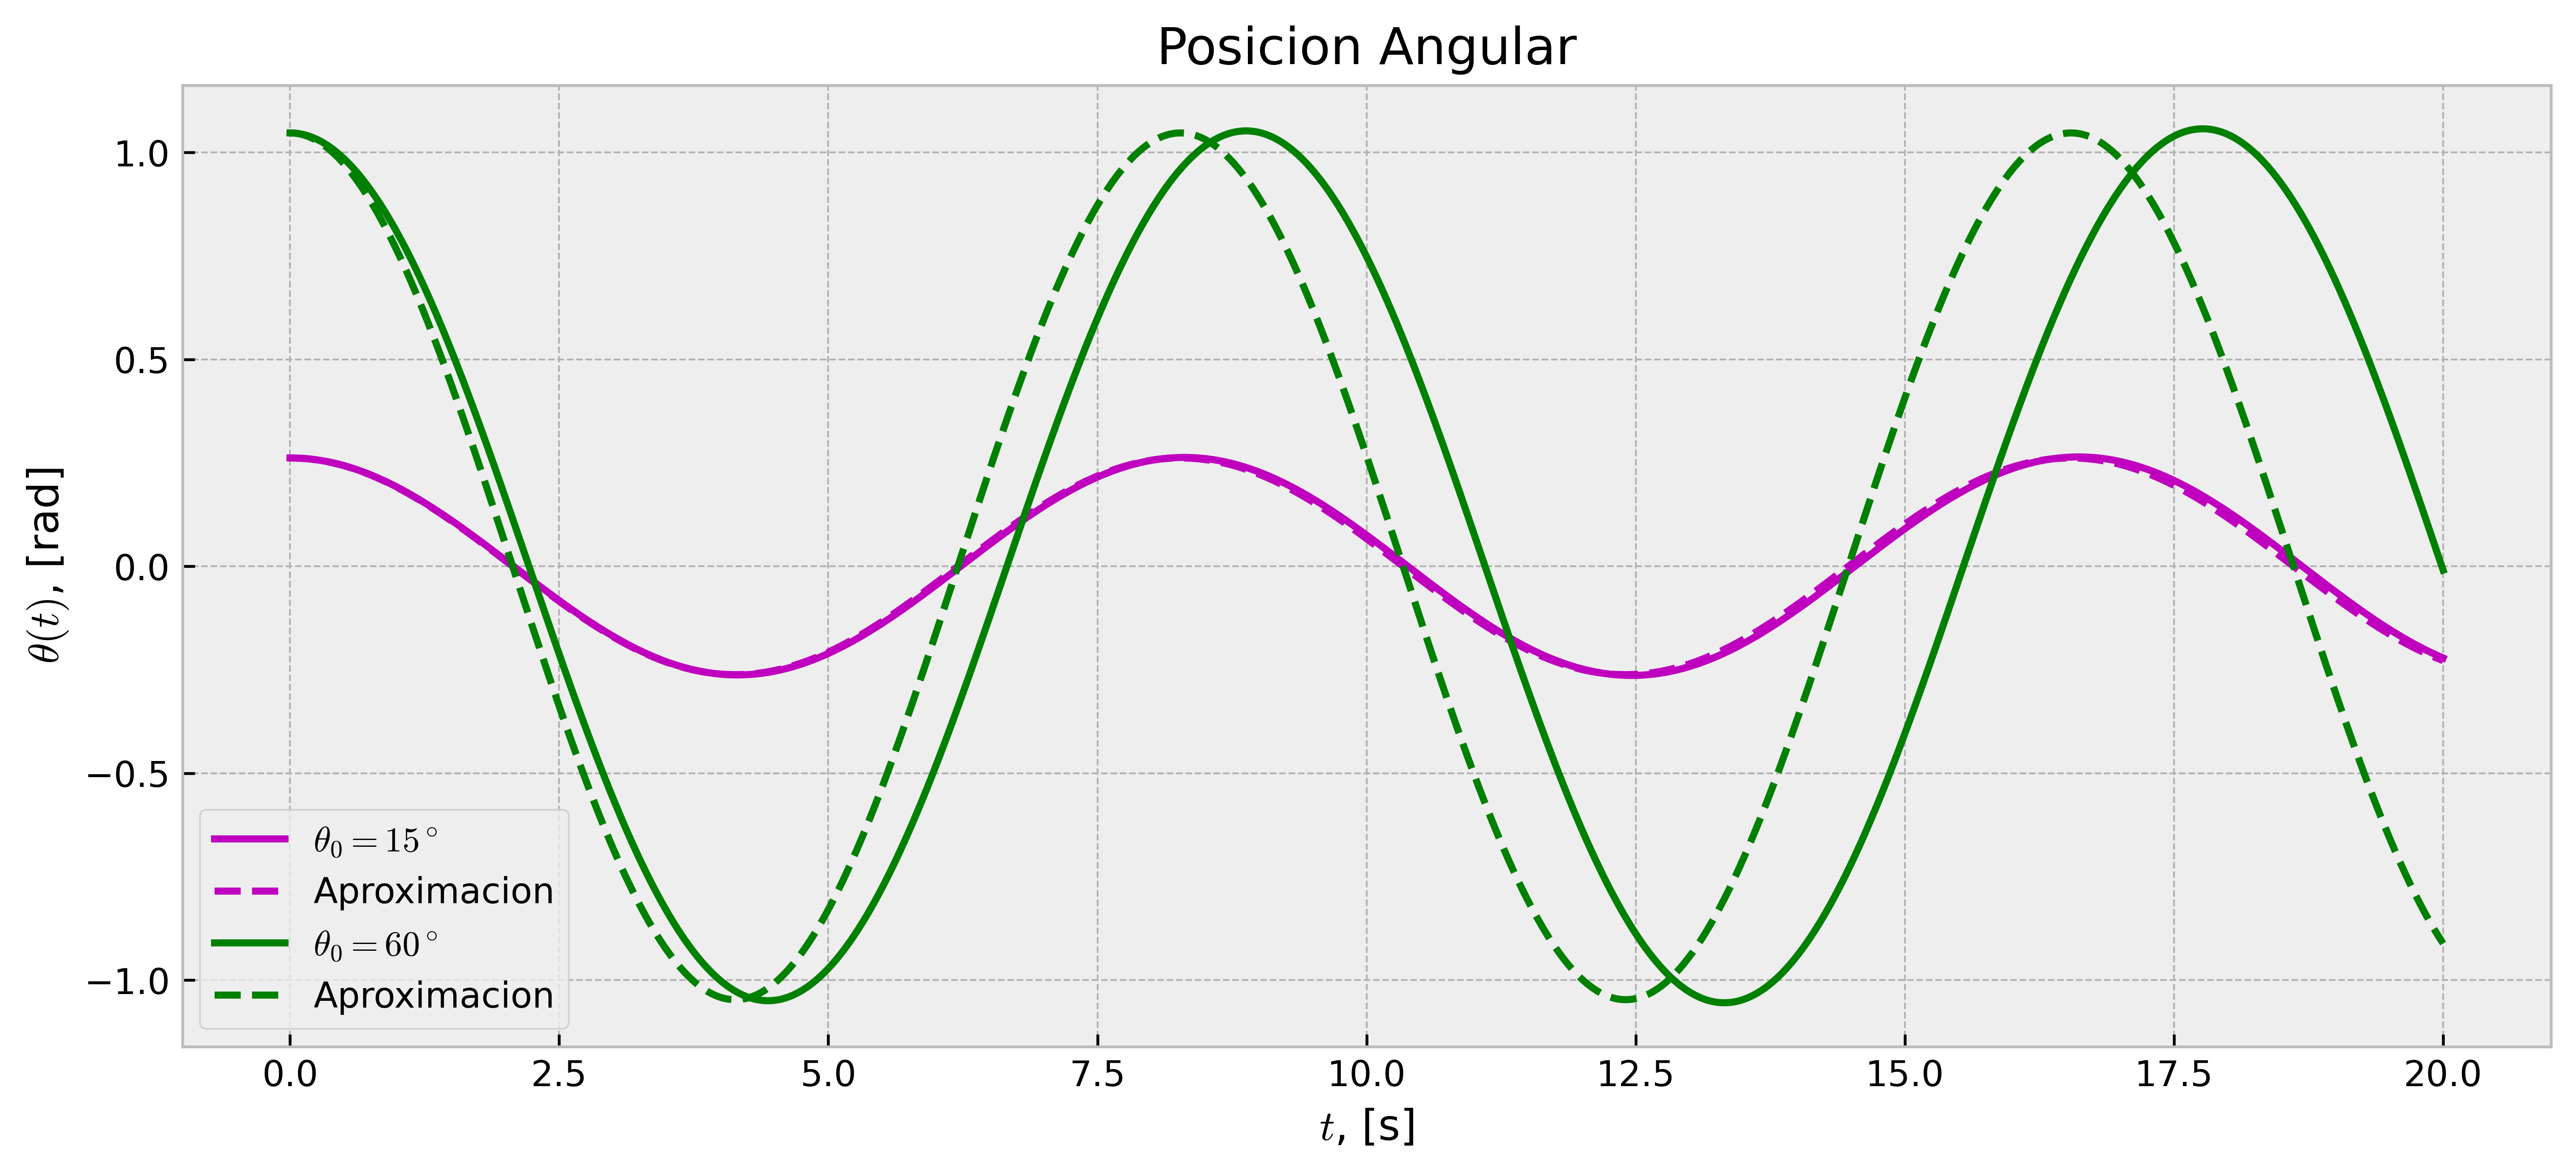

In [11]:
plt.figure(figsize=figsize, dpi=dpi)
plt.title("Posicion Angular")
plt.plot(t, theta1, "m", label=r"$\theta_0=%.0f^\circ$"%(theta01*180/np.pi))
plt.plot(t, approx(t, theta01), "m--", label=r"Aproximacion")
plt.plot(t, theta2, "g", label=r"$\theta_0=%.0f^\circ$"%(theta02*180/np.pi))
plt.plot(t, approx(t, theta02), "g--", label=r"Aproximacion")
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"$\theta(t)$, [rad]")
plt.legend()
plt.show()

Es notable el resultado de la aproximación para ángulos pequeños, pero cuando el ángulo inicial es mayor, la aproximación se vuelve menos precisa.

## Conservación de la energía

La energía mecánica total,
\begin{equation}
E = U + K = mgL(1 - \cos\theta) + \frac{1}{2}mL^2\dot\theta^2,
\end{equation}
debe conservarse. Entonces es una forma excelente para verificar si el paso temporal empleado arriba es suficientemente pequeño. Grafiquemos la energía cinética para el ángulo inicial mayor. 

In [12]:
def get_U(theta):
    """ Computamos la energía potencial. """
    return m*g*L*(1 - np.cos(theta))

def get_K(w):
    """ Computamos la energía cinética. """
    return 0.5*m*L**2*np.array(w)**2

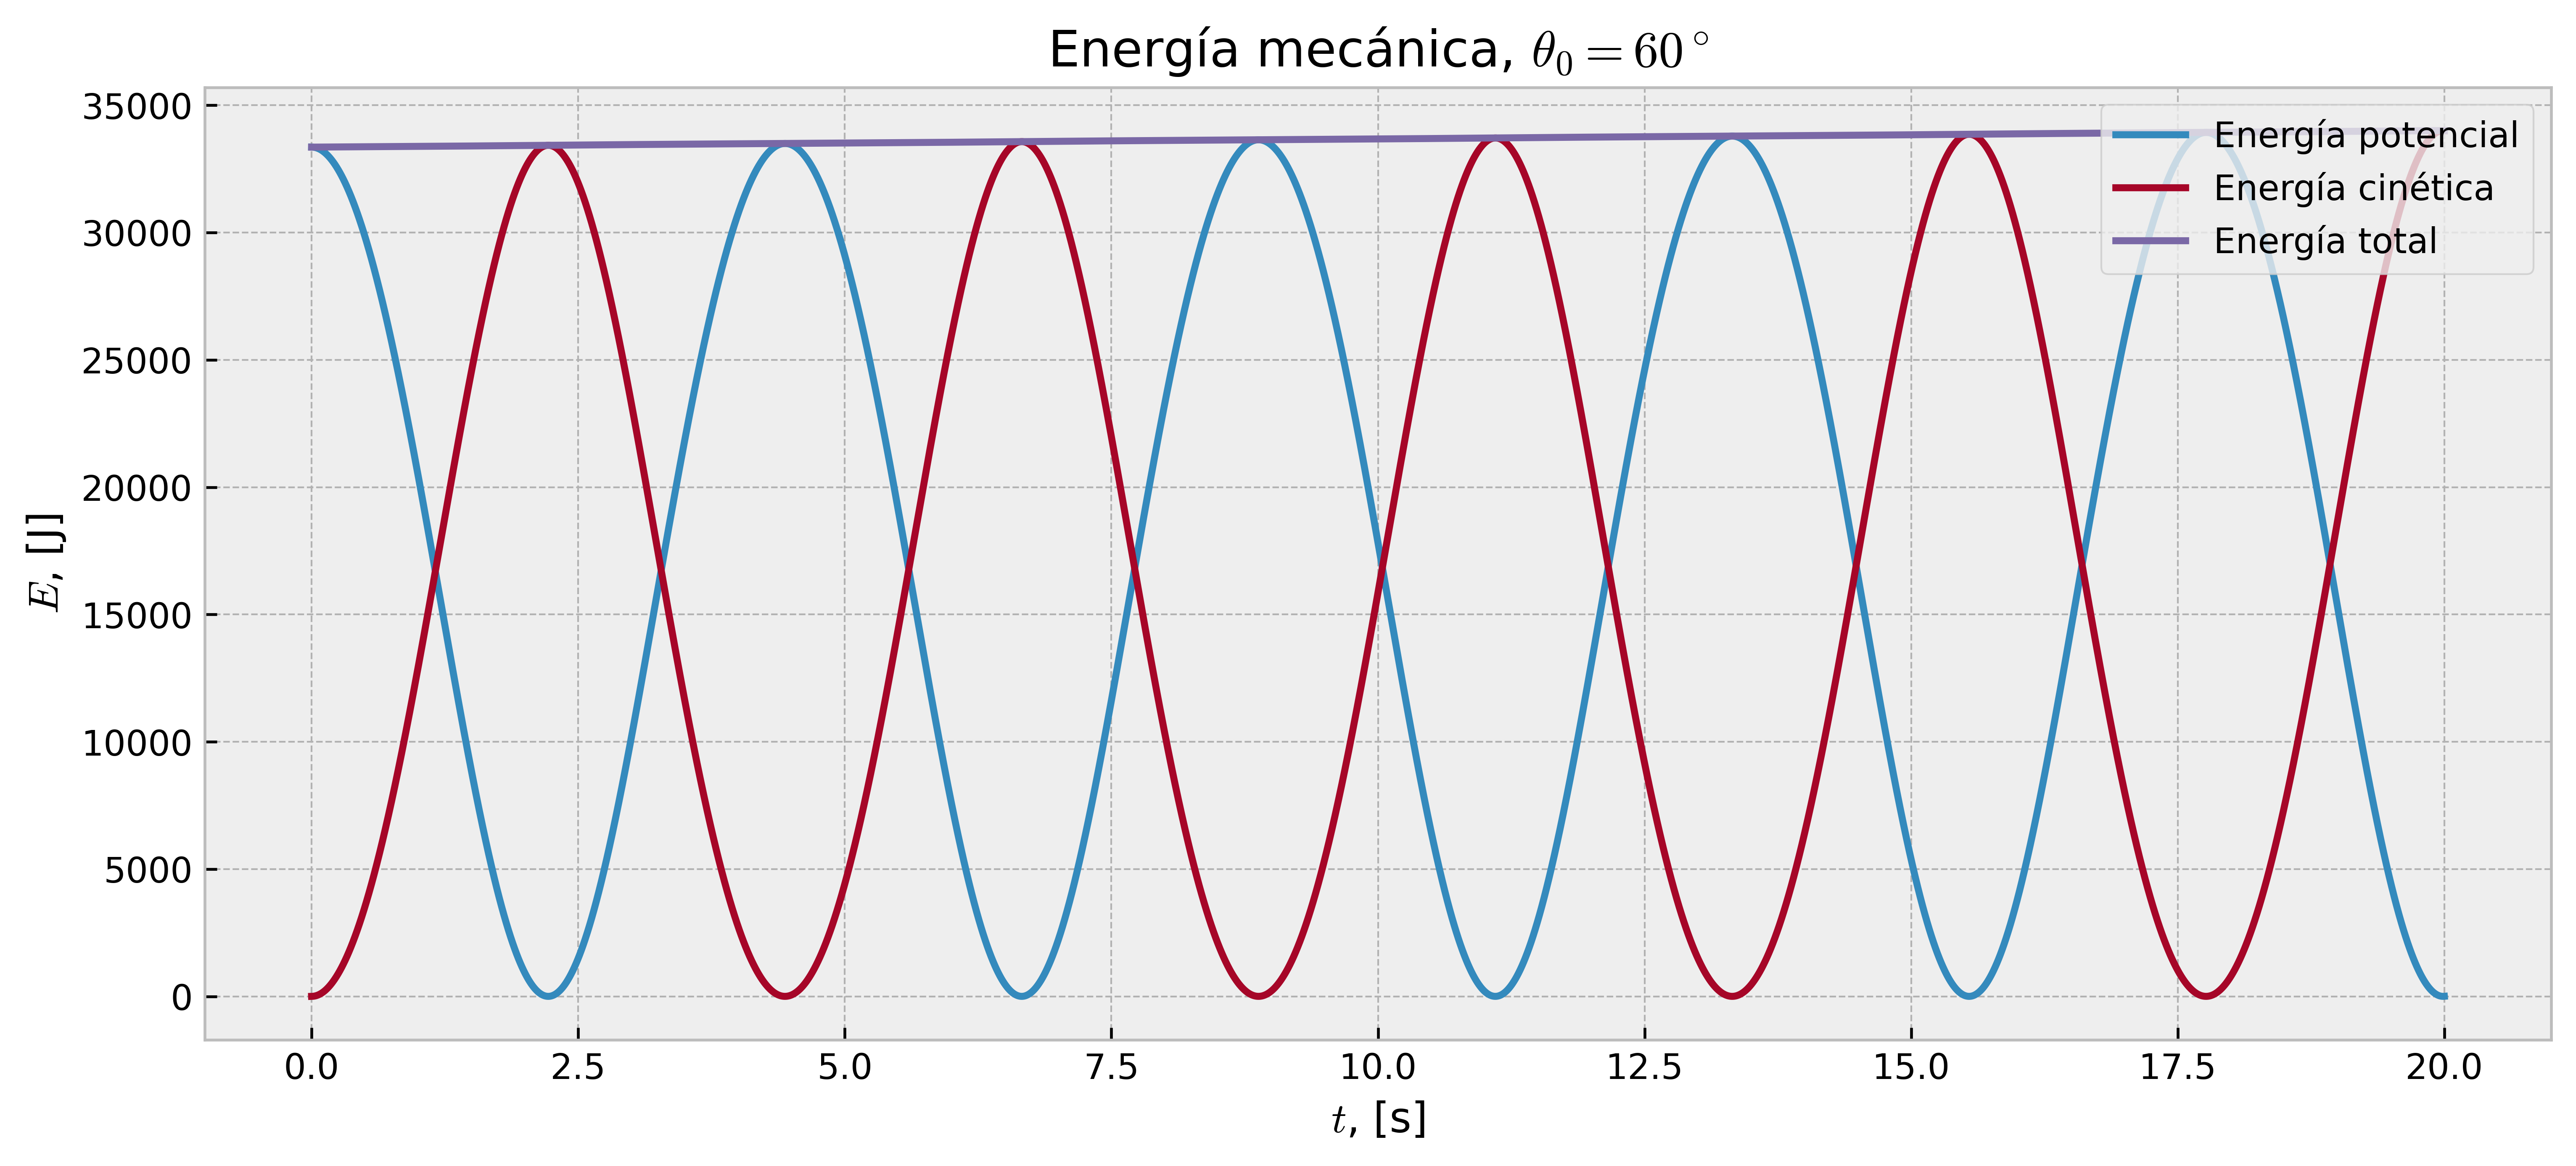

In [13]:
plt.figure(figsize=figsize, dpi=dpi)
plt.title(r"Energía mecánica, $\theta_0=%.0f^\circ$"%(theta02*180/np.pi))
plt.plot(t, get_U(theta2), label=r"Energía potencial")
plt.plot(t, get_K(w2), label=r"Energía cinética")
plt.plot(t, get_U(theta2) + get_K(w2), label=r"Energía total")
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"$E$, [J]")
plt.legend(loc=1)
plt.show()

El cambio en energía total es mínimo, entonces podemos concluir que el paso temporal utilizado fue suficientemente pequeño. Para ser más precisos, podemos verificar que el cambio relativo es pequeño:

In [14]:
def get_error(theta, w):
    """ Computamos error relativo. """
    E0 = get_U(theta[0]) + get_K(w[0])
    E1 = get_U(theta[-1]) + get_K(w[-1])
    return np.abs((E0 - E1)/E0)

print("Cambio relativo en E:")
print("Theta = %.0f: %.2e"%(theta01*180/np.pi, get_error(theta1, w1)))
print("Theta = %.0f: %.2e"%(theta02*180/np.pi, get_error(theta2, w2)))

Cambio relativo en E:
Theta = 15: 2.31e-02
Theta = 60: 1.95e-02


**Ejercicio: ** Modifique el valor de tiempo $T$ en la solución numérica y vuelva a ejecutar las celdas hasta aquí. Preste mucha atención a los cambios. Discuta con sus compañeros y los docentes. 

## Péndulo amortiguado

Un péndulo real no puede oscilar eternamente. Debido a la fricción, eventualmente el péndulo se frenará y detendrá. A bajas velocidades, la resistencia del aire es proporcional a la velocidad, $f = -b\dot \theta$. La ecuación diferencial que describe este péndulo es 
\begin{equation}
L\ddot \theta - \frac{b}{m}\dot \theta + g\sin\theta = 0.
\label{eq:diff_damped}
\end{equation}
Con solución analítica para $\theta \ll 1$. Se deja como ejercicio para el estudiante.

De la misma manera a como hicimos para la ecuación \eqref{eq:diff}, encontramos la forma aproximada 
\begin{equation}
\begin{aligned}
\Delta\omega &= -\frac{g}{L}\sin\theta\;\Delta t + \frac{b}{Lm}\omega,\\
\Delta\theta &= \omega\;\Delta t.
\end{aligned}\label{eq:numdiff_damped}
\end{equation}
Solo necesitamos cambiar la función `RHS` para implementar esto.

In [15]:
def RHS(theta, w, dt):
    """ Devuelve el lado derecho de la EDO que 
    describe al pendulo simple amortiguado.
    """
    dw = -np.sin(theta)*dt*g/L - b/(L*m)*w*dt
    dtheta = w*dt
    return dtheta, dw

Consideremos $L=1\;\mathrm{m}$, $m=1\;\mathrm{kg}$ y $b=1\;\mathrm{kg\;m}$. Prueben otros valores ustedes mismos! Dejen además que la masa puntual tenga velocidad inicial. 

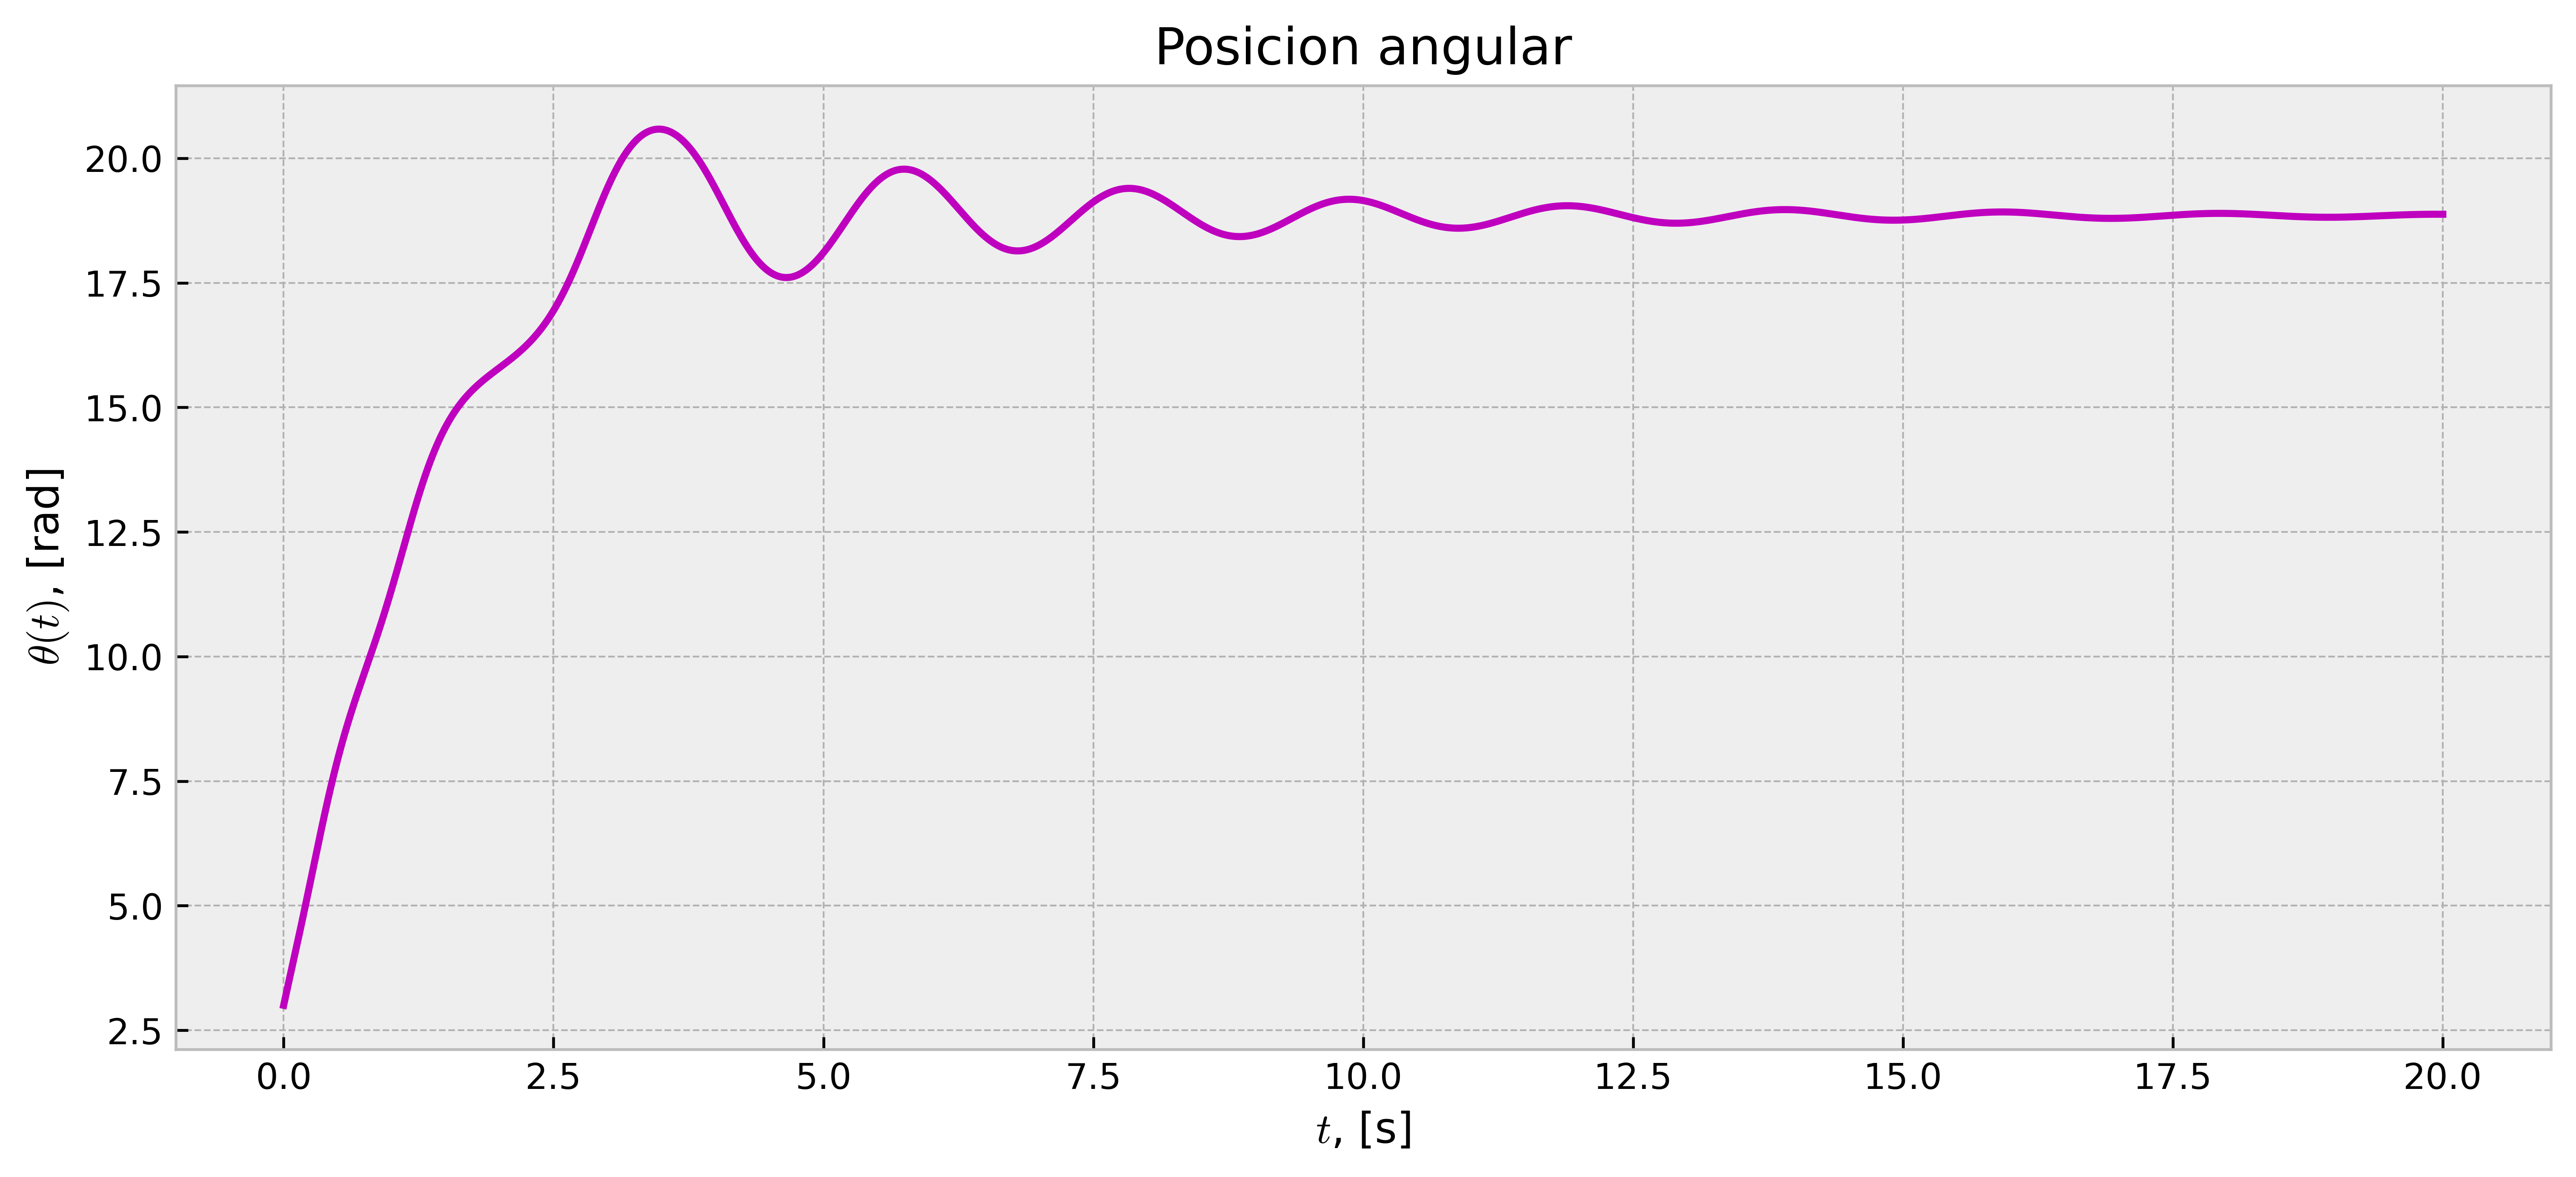

In [16]:
g = 9.81    # m/s^2. Acel. Grav.
m = 1.      # kg. Masa
L = 1.      # m. Longitud de cuerda
w0 = 10     # 1/s. Velocidad angular inicial
theta0 = 3. # rad. Angulo inicial
T = 20.     # s. Tiempo de simulación
n = 100000  # Numero de pasos
b = .5      # kg m. Factor de amortiguamiento

t = np.linspace(0, T, n + 1)
theta, _ = euler_method(theta0, w0, T/float(n), n)

plt.figure(figsize=figsize, dpi=dpi)
plt.title("Posicion angular")
plt.plot(t, theta, "m")
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"$\theta(t)$, [rad]")
plt.show()

In [17]:
### EJERCICIO. Incluya aquí todo el código necesario para verficar que la suma de la energía mecánica 
### y la energía disipada es aproximadamente constante.










**Ejercicio: ** Verificar que la suma de la energía mecánica y la energía disipada es aproximadamente constante. 

**Ejercicio: ** Resolver la ecuación \eqref{eq:diff_damped} para $\theta \ll 1$. ¿Cuál es la diferencia entre las oscilaciones subamortiguadas y sobreamortiguadas?

## Animación

Cerramos esta clase haciendo una animación de un péndulo!

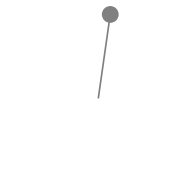

In [18]:
import matplotlib
x = np.sin(theta)
y = -np.cos(theta)

from matplotlib import animation
from IPython.display import HTML
FPS=30
plt.style.use('default')

# Configuracion de la figura
fig = plt.figure(figsize=(4, 4), dpi=60)
ax = plt.axes(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))
ax.set_aspect('equal')
ax.axis('off')

# Definir los diferentes elementos de la animacion
rod, = ax.plot([], [], color="grey", linewidth=2)
ball = plt.Circle((x[0], y[0]), 0.1, fc="grey")
ax.add_patch(ball)

# Calcular el numero de pasos
framesNum = int(FPS*t[-1])

# Funcion de animacion. Es una forma secuencial
def animate(j):
    i = j*int(n/framesNum)
    ball.center = (x[i], y[i])
    rod.set_data([0, x[i]], [0, y[i]])

# Creamos la animacion
anim = animation.FuncAnimation(fig, animate, frames=framesNum, interval=1000/FPS)

#plt.show()

#plt.close(anim._fig)

# Y la mostramos
HTML(anim.to_html5_video())